<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-FabianMunozAguirre/blob/main/Actividad_Semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fabian Munoz Aguirre A00354910**
## **Ciencia y Analitica de datos**
## **Profesor: Dra. Maria de la Paz Rico Fernández**

In [1]:
import pandas as pd
import numpy as np
from numpy import array
from numpy.linalg import eig

import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.special import boxcox1p

# Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
This study reviewed the literature and used the following 23 variables as explanatory variables:

**X1**: Amount of the given credit (NT dollar): it includes both the individual  consumer credit and his/her family (supplementary) credit.

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

**X4**: Marital status (1 = married; 2 = single; 3 = others)

**X5**: Age (year)

**X6 - X11**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

**X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

**X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 

In [2]:
File_Path ="https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [3]:
Read_data = pd.read_csv(File_Path, index_col=0)
df = Read_data.copy()
df.columns = ["LIMIT_BAL","GENDER","EDUCATION","MARRIAGE","AGE",
              "PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6",
              "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",
              "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6",
              "DEFAULT"]

In [4]:
df.shape

(30000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   GENDER     29999 non-null  float64
 2   EDUCATION  29998 non-null  float64
 3   MARRIAGE   29998 non-null  float64
 4   AGE        29995 non-null  float64
 5   PAY_1      29997 non-null  float64
 6   PAY_2      29995 non-null  float64
 7   PAY_3      29993 non-null  float64
 8   PAY_4      29991 non-null  float64
 9   PAY_5      29984 non-null  float64
 10  PAY_6      29986 non-null  float64
 11  BILL_AMT1  29989 non-null  float64
 12  BILL_AMT2  29989 non-null  float64
 13  BILL_AMT3  29987 non-null  float64
 14  BILL_AMT4  29985 non-null  float64
 15  BILL_AMT5  29983 non-null  float64
 16  BILL_AMT6  29990 non-null  float64
 17  PAY_AMT1   29992 non-null  float64
 18  PAY_AMT2   29991 non-null  float64
 19  PAY_AMT3   29992 non-null  float64
 20  PAY_AM

In [6]:
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
cleandf = df.dropna(axis=0)

In [8]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29958 non-null  int64  
 1   GENDER     29958 non-null  float64
 2   EDUCATION  29958 non-null  float64
 3   MARRIAGE   29958 non-null  float64
 4   AGE        29958 non-null  float64
 5   PAY_1      29958 non-null  float64
 6   PAY_2      29958 non-null  float64
 7   PAY_3      29958 non-null  float64
 8   PAY_4      29958 non-null  float64
 9   PAY_5      29958 non-null  float64
 10  PAY_6      29958 non-null  float64
 11  BILL_AMT1  29958 non-null  float64
 12  BILL_AMT2  29958 non-null  float64
 13  BILL_AMT3  29958 non-null  float64
 14  BILL_AMT4  29958 non-null  float64
 15  BILL_AMT5  29958 non-null  float64
 16  BILL_AMT6  29958 non-null  float64
 17  PAY_AMT1   29958 non-null  float64
 18  PAY_AMT2   29958 non-null  float64
 19  PAY_AMT3   29958 non-null  float64
 20  PAY_AM

In [9]:
cleandf['EDUCATION'].value_counts()

2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: EDUCATION, dtype: int64

In [10]:
cleandf.loc[cleandf["EDUCATION"] > 4, "EDUCATION"] = 4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
cleandf.loc[cleandf["EDUCATION"] == 0, "EDUCATION"] = 4

In [12]:
cleandf['EDUCATION'].value_counts()

2.0    14009
1.0    10572
3.0     4909
4.0      468
Name: EDUCATION, dtype: int64

In [13]:
cleandf['GENDER'].value_counts()

2.0    18095
1.0    11863
Name: GENDER, dtype: int64

In [14]:
cleandf['MARRIAGE'].value_counts()

2.0    15939
1.0    13643
3.0      322
0.0       54
Name: MARRIAGE, dtype: int64

In [15]:
cleandf.loc[cleandf["MARRIAGE"] == 0, "MARRIAGE"] = 3

In [16]:
cleandf['MARRIAGE'].value_counts()

2.0    15939
1.0    13643
3.0      376
Name: MARRIAGE, dtype: int64

In [17]:
cleandf['DEFAULT'].value_counts()

0.0    23333
1.0     6625
Name: DEFAULT, dtype: int64

In [18]:
cleandf.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
EDUCATION,29958.0,1.842212,0.744557,1.0,1.00,2.0,2.00,4.0
MARRIAGE,29958.0,1.557147,0.521388,1.0,1.00,2.0,2.00,3.0
AGE,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
PAY_1,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
PAY_2,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
PAY_3,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
PAY_4,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
PAY_5,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


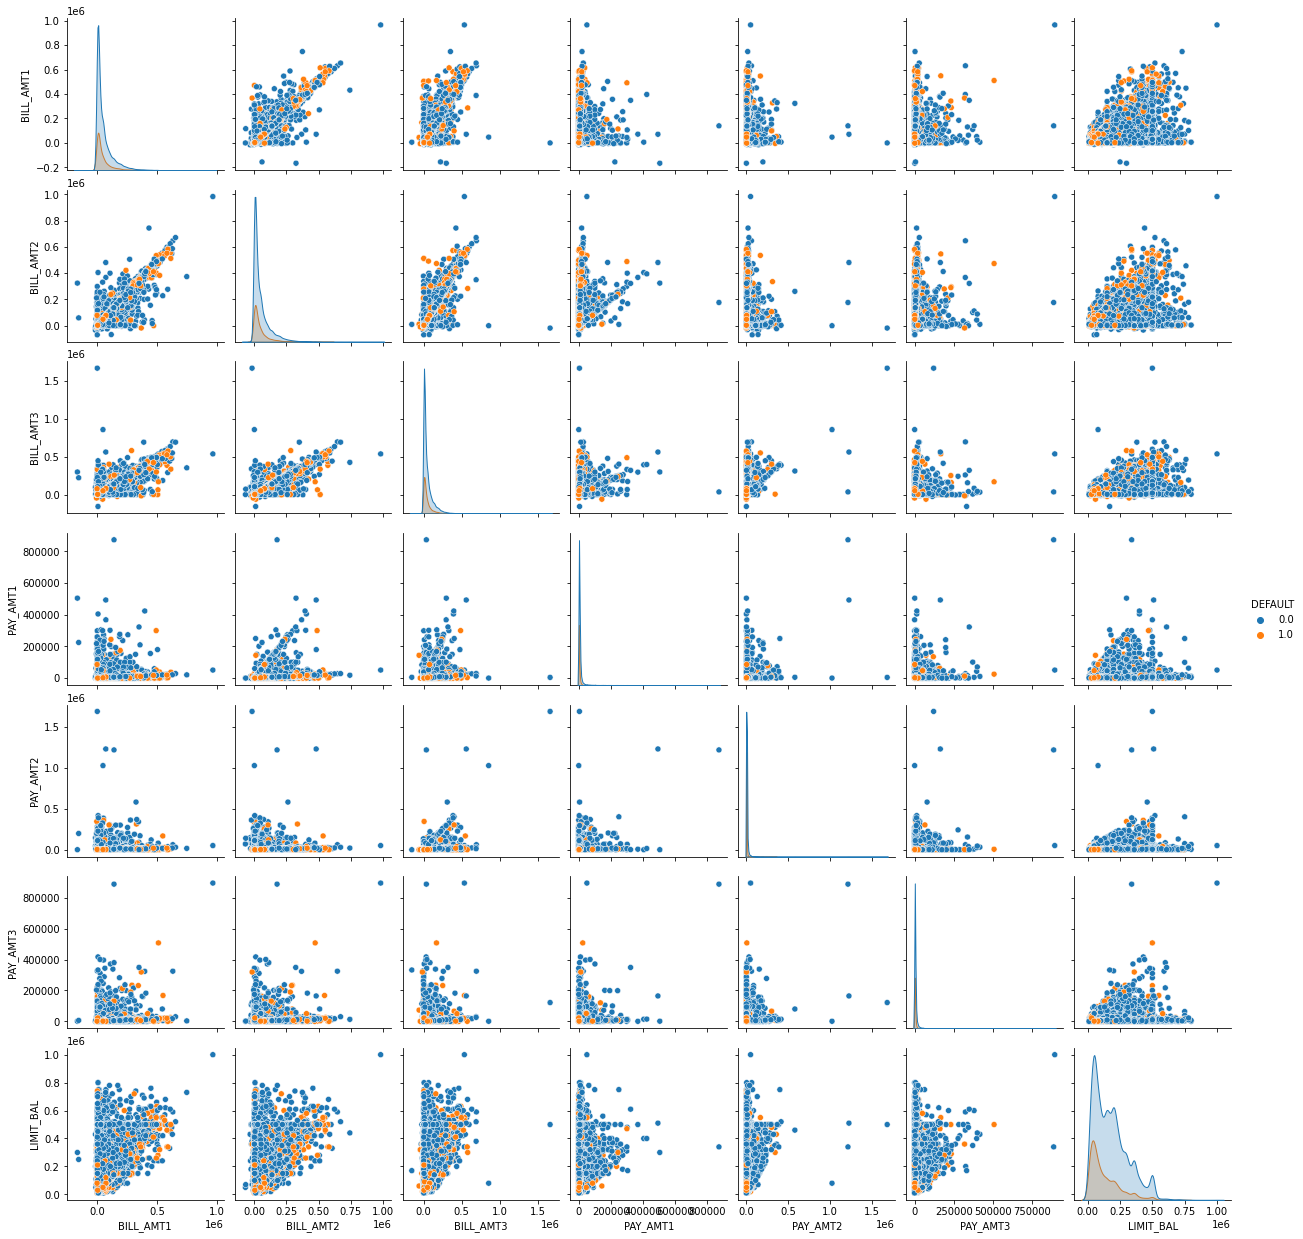

In [19]:
sns.pairplot(cleandf[["BILL_AMT1","BILL_AMT2","BILL_AMT3","PAY_AMT1","PAY_AMT2","PAY_AMT3","LIMIT_BAL","DEFAULT"]], hue="DEFAULT")

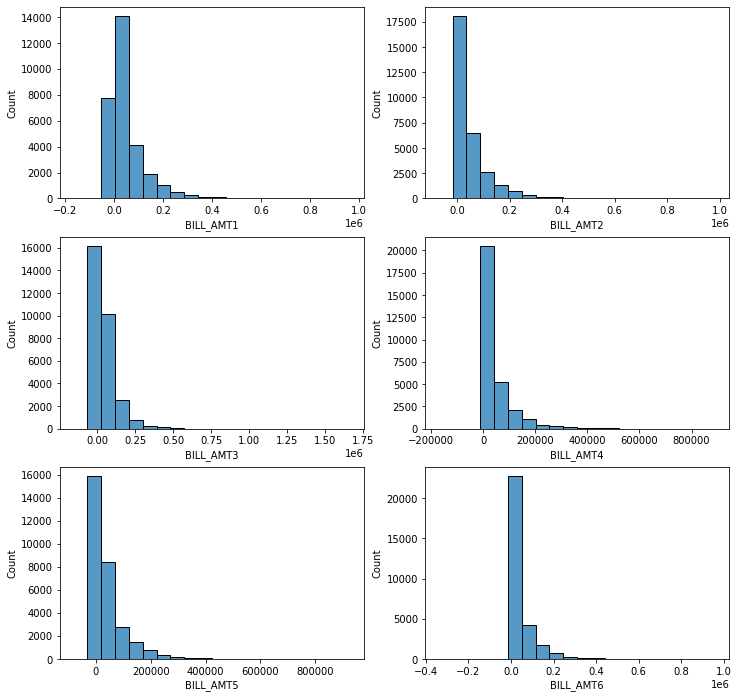

In [19]:
fig, ax = plt.subplots(3,2, figsize=(12,12))
sns.histplot(cleandf['BILL_AMT1'], bins = 20, ax=ax[0,0])
sns.histplot(cleandf['BILL_AMT2'], bins = 20, ax=ax[0,1])
sns.histplot(cleandf['BILL_AMT3'], bins = 20, ax=ax[1,0])
sns.histplot(cleandf['BILL_AMT4'], bins = 20, ax=ax[1,1])
sns.histplot(cleandf['BILL_AMT5'], bins = 20, ax=ax[2,0])
sns.histplot(cleandf['BILL_AMT6'], bins = 20, ax=ax[2,1])

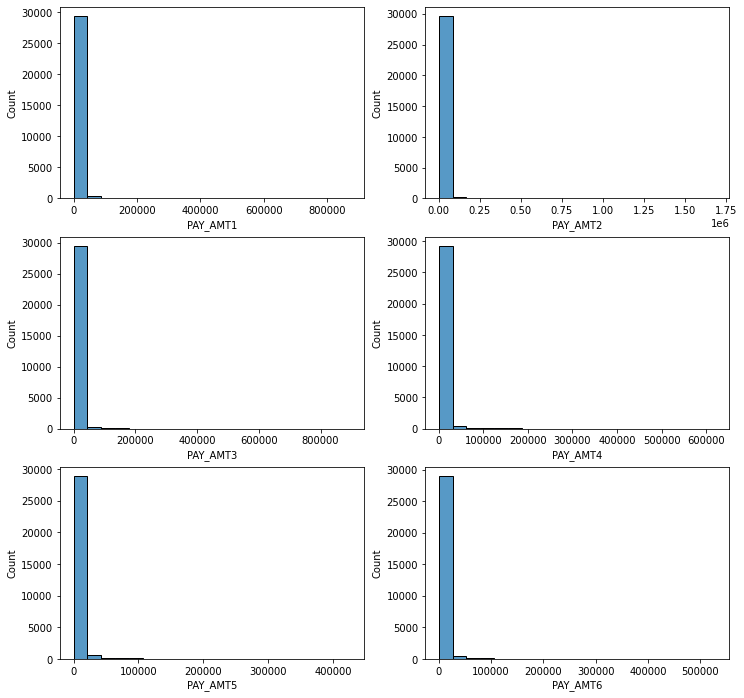

In [21]:
fig, ax = plt.subplots(3,2, figsize=(12,12))
sns.histplot(cleandf['PAY_AMT1'], bins = 20, ax=ax[0,0])
sns.histplot(cleandf['PAY_AMT2'], bins = 20, ax=ax[0,1])
sns.histplot(cleandf['PAY_AMT3'], bins = 20, ax=ax[1,0])
sns.histplot(cleandf['PAY_AMT4'], bins = 20, ax=ax[1,1])
sns.histplot(cleandf['PAY_AMT5'], bins = 20, ax=ax[2,0])
sns.histplot(cleandf['PAY_AMT6'], bins = 20, ax=ax[2,1])

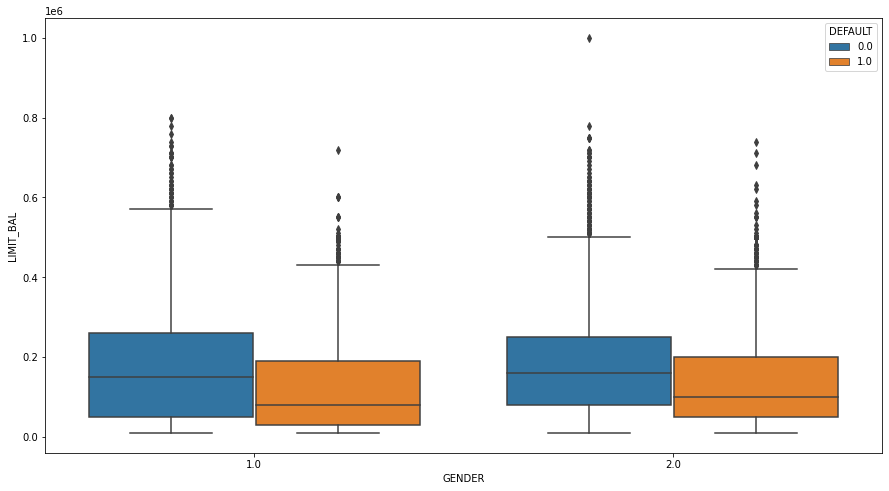

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x="GENDER", y="LIMIT_BAL", hue="DEFAULT", data=cleandf)

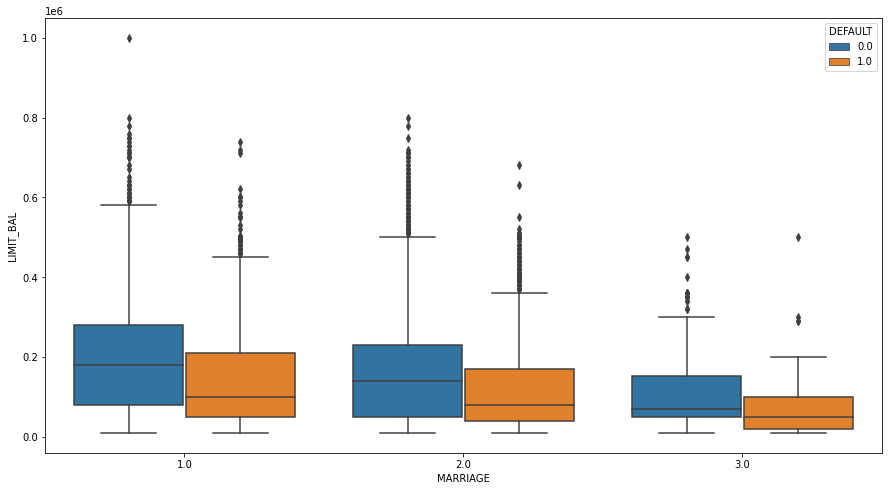

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", hue="DEFAULT", data=cleandf)

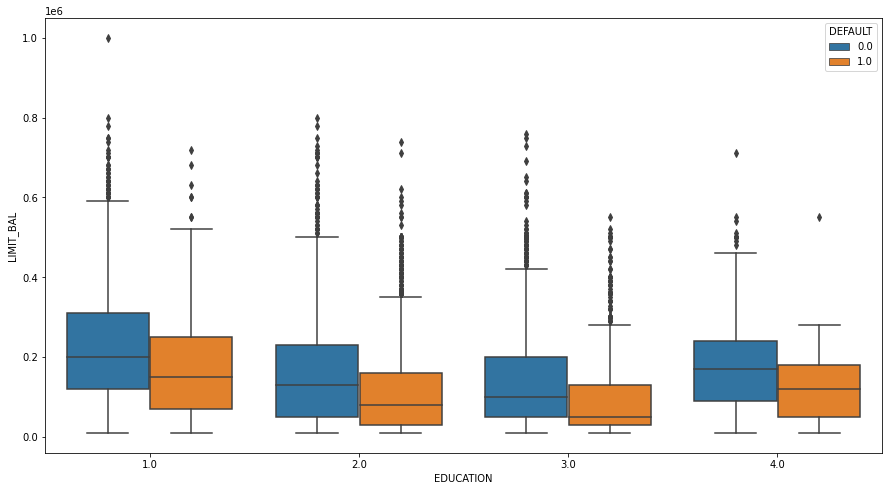

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", hue="DEFAULT", data=cleandf)

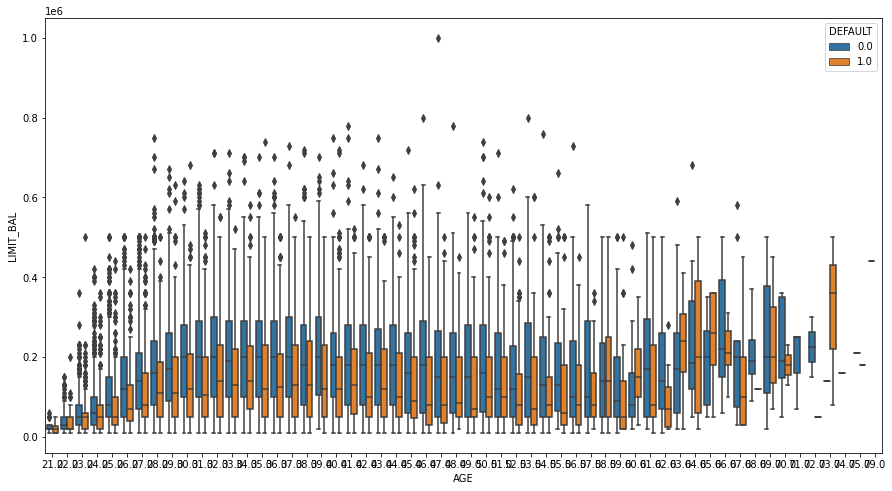

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(x="AGE", y="LIMIT_BAL", hue="DEFAULT", data=cleandf)

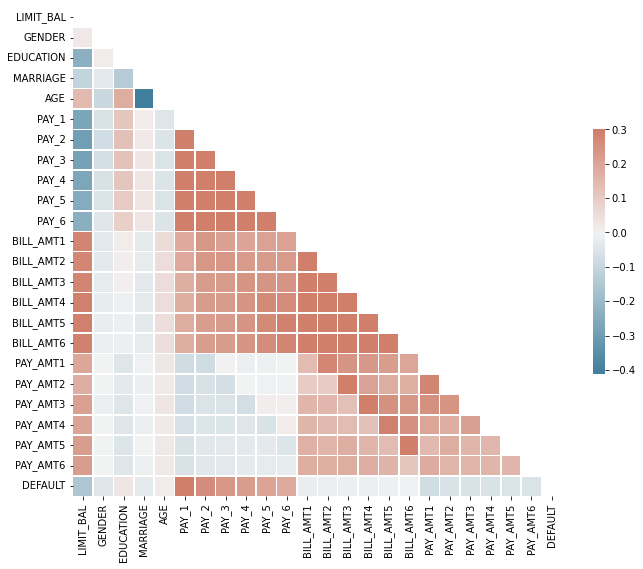

In [26]:
corr = cleandf.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
BILL_X1 = cleandf['BILL_AMT1']
BILL_X2 = cleandf['BILL_AMT2']
BILL_X3 = cleandf['BILL_AMT3']

PAYAMT_X1 = cleandf['PAY_AMT1']
PAYAMT_X2 = cleandf['PAY_AMT2']
PAYAMT_X3 = cleandf['PAY_AMT3']

LIMIT_BAL = cleandf['LIMIT_BAL']

In [21]:
sel_cols_stg = cleandf[["GENDER","EDUCATION","MARRIAGE","AGE","DEFAULT","PAY_1","PAY_2","PAY_3"]]

df_Staged_Transformed = pd.DataFrame()
df_Staged_Transformed = sel_cols_stg.copy()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


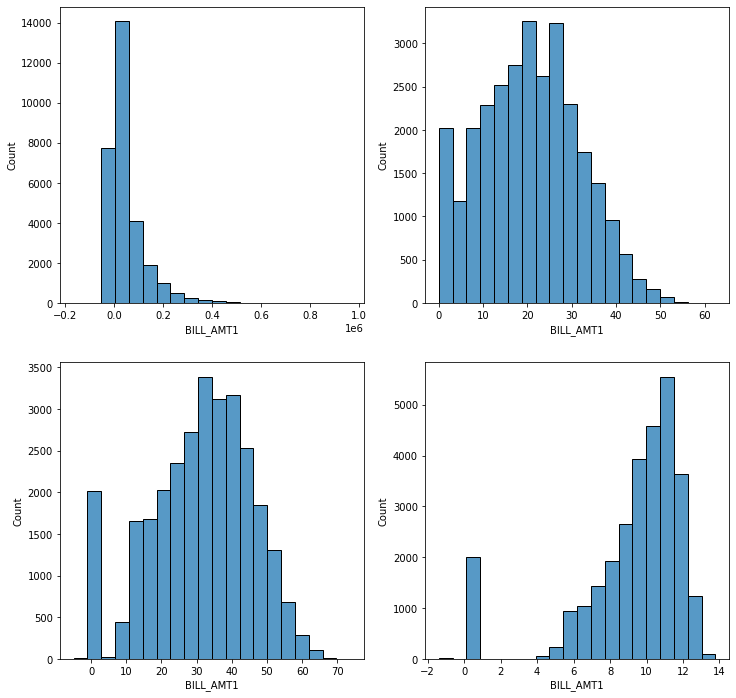

In [22]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

BILL_X1_pwr = np.power(BILL_X1, 0.299999)
BILL_X1_bxcx = boxcox1p(BILL_X1, 0.2)
BILL_X1_log = np.log(BILL_X1 + 1.25)

sns.histplot(cleandf['BILL_AMT1'], bins = 20, ax=ax[0,0])
sns.histplot(BILL_X1_pwr, bins = 20, ax=ax[0,1])
sns.histplot(BILL_X1_bxcx, bins = 20, ax=ax[1,0])
sns.histplot(BILL_X1_log, bins = 20, ax=ax[1,1])

In [23]:
df_Staged_Transformed['BILL_AMT1'] = BILL_X1_bxcx
df_Staged_Transformed.head()

,GENDER,EDUCATION,MARRIAGE,AGE,DEFAULT,PAY_1,PAY_2,PAY_3,BILL_AMT1
ID,,,,,,,,,
1,2.0,2.0,1.0,24.0,1.0,2.0,2.0,-1.0,21.151353
2,2.0,2.0,2.0,26.0,1.0,-1.0,2.0,0.0,19.249017
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,34.098985
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,37.990544
5,1.0,2.0,1.0,57.0,0.0,-1.0,0.0,-1.0,25.623252


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


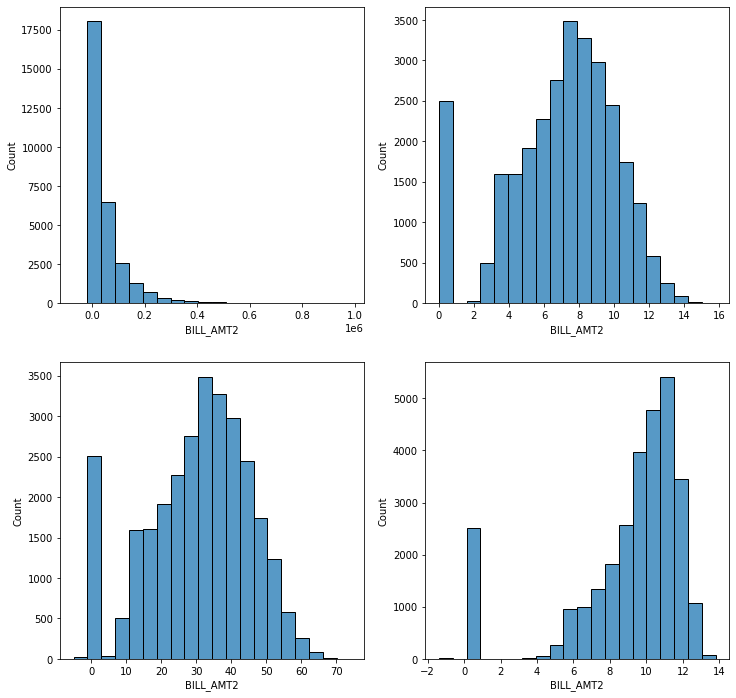

In [24]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

BILL_X2_pwr = np.power(BILL_X2, 0.199999)
BILL_X2_bxcx = boxcox1p(BILL_X2, 0.19999)
BILL_X2_log = np.log(BILL_X2 + 1.25)

sns.histplot(cleandf['BILL_AMT2'], bins = 20, ax=ax[0,0])
sns.histplot(BILL_X2_pwr, bins = 20, ax=ax[0,1])
sns.histplot(BILL_X2_bxcx, bins = 20, ax=ax[1,0])
sns.histplot(BILL_X2_log, bins = 20, ax=ax[1,1])

In [25]:
df_Staged_Transformed['BILL_AMT2'] = BILL_X2_bxcx
df_Staged_Transformed.head()

,GENDER,EDUCATION,MARRIAGE,AGE,DEFAULT,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2
ID,,,,,,,,,,
1,2.0,2.0,1.0,24.0,1.0,2.0,2.0,-1.0,21.151353,19.963692
2,2.0,2.0,2.0,26.0,1.0,-1.0,2.0,0.0,19.249017,17.200493
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,34.098985,28.755627
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,37.990544,38.212862
5,1.0,2.0,1.0,57.0,0.0,-1.0,0.0,-1.0,25.623252,23.163217


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


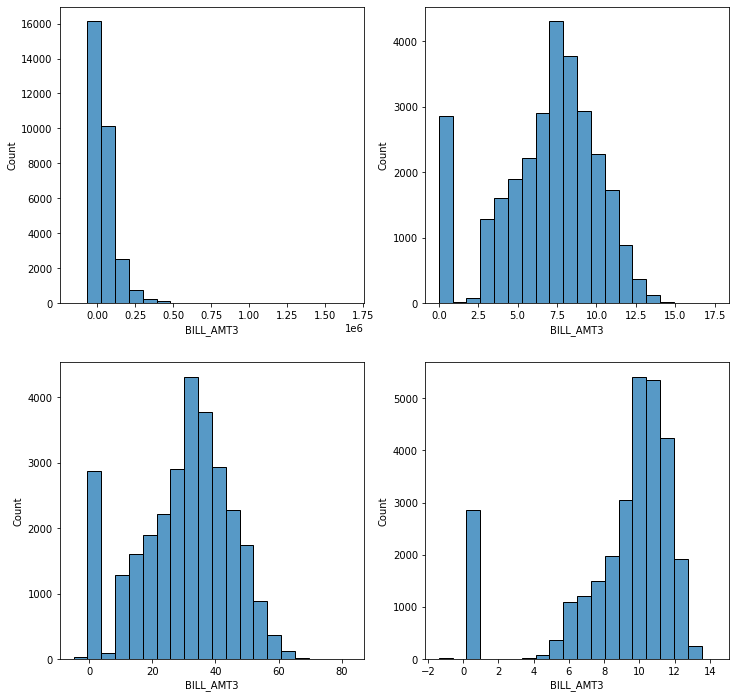

In [26]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

BILL_X3_pwr = np.power(BILL_X3, 0.199999)
BILL_X3_bxcx = boxcox1p(BILL_X3, 0.19999)
BILL_X3_log = np.log(BILL_X3 + 1.25)

sns.histplot(cleandf['BILL_AMT3'], bins = 20, ax=ax[0,0])
sns.histplot(BILL_X3_pwr, bins = 20, ax=ax[0,1])
sns.histplot(BILL_X3_bxcx, bins = 20, ax=ax[1,0])
sns.histplot(BILL_X3_log, bins = 20, ax=ax[1,1])

In [27]:
df_Staged_Transformed['BILL_AMT3'] = BILL_X3_bxcx
df_Staged_Transformed.head()

,GENDER,EDUCATION,MARRIAGE,AGE,DEFAULT,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3
ID,,,,,,,,,,,
1,2.0,2.0,1.0,24.0,1.0,2.0,2.0,-1.0,21.151353,19.963692,13.481077
2,2.0,2.0,2.0,26.0,1.0,-1.0,2.0,0.0,19.249017,17.200493,19.248065
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,34.098985,28.755627,28.527340
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,37.990544,38.212862,38.400784
5,1.0,2.0,1.0,57.0,0.0,-1.0,0.0,-1.0,25.623252,23.163217,35.719967


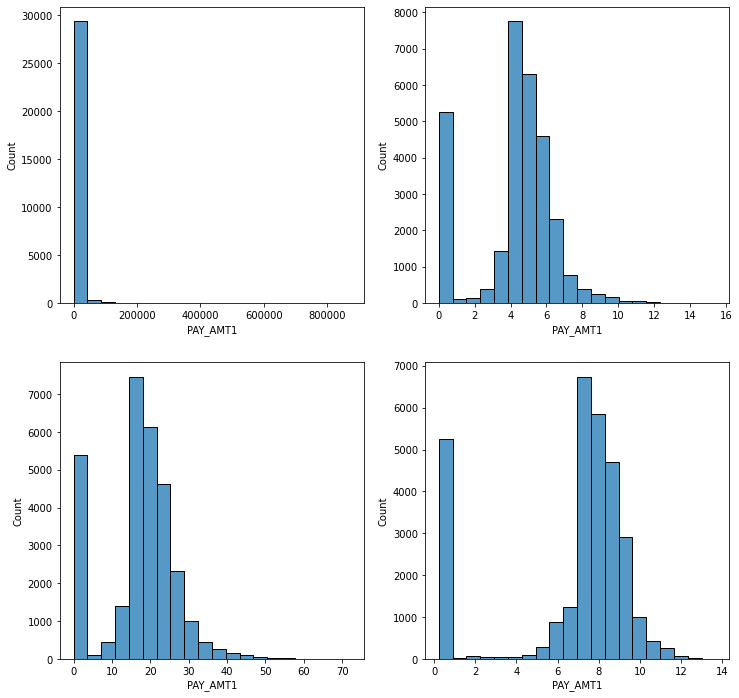

In [28]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

PAYAMT_X1_pwr = np.power(PAYAMT_X1, 0.199999)
PAYAMT_X1_bxcx = boxcox1p(PAYAMT_X1, 0.19999)
PAYAMT_X1_log = np.log(PAYAMT_X1 + 1.25)

sns.histplot(cleandf['PAY_AMT1'], bins = 20, ax=ax[0,0])
sns.histplot(PAYAMT_X1_pwr, bins = 20, ax=ax[0,1])
sns.histplot(PAYAMT_X1_bxcx, bins = 20, ax=ax[1,0])
sns.histplot(PAYAMT_X1_log, bins = 20, ax=ax[1,1])

In [29]:
df_Staged_Transformed['PAY_AMT1'] = PAYAMT_X1_bxcx
df_Staged_Transformed.head()

,GENDER,EDUCATION,MARRIAGE,AGE,DEFAULT,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1
ID,,,,,,,,,,,,
1,2.0,2.0,1.0,24.0,1.0,2.0,2.0,-1.0,21.151353,19.963692,13.481077,0.000000
2,2.0,2.0,2.0,26.0,1.0,-1.0,2.0,0.0,19.249017,17.200493,19.248065,0.000000
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,34.098985,28.755627,28.527340,16.640458
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,37.990544,38.212862,38.400784,17.866694
5,1.0,2.0,1.0,57.0,0.0,-1.0,0.0,-1.0,25.623252,23.163217,35.719967,17.866694


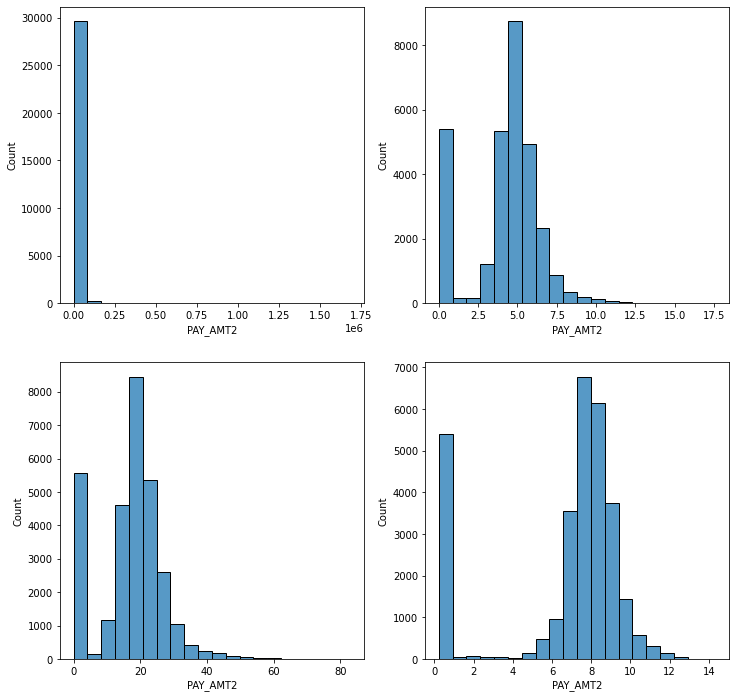

In [30]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

PAYAMT_X2_pwr = np.power(PAYAMT_X2, 0.199999)
PAYAMT_X2_bxcx = boxcox1p(PAYAMT_X2, 0.19999)
PAYAMT_X2_log = np.log(PAYAMT_X2 + 1.25)

sns.histplot(cleandf['PAY_AMT2'], bins = 20, ax=ax[0,0])
sns.histplot(PAYAMT_X2_pwr, bins = 20, ax=ax[0,1])
sns.histplot(PAYAMT_X2_bxcx, bins = 20, ax=ax[1,0])
sns.histplot(PAYAMT_X2_log, bins = 20, ax=ax[1,1])

In [31]:
df_Staged_Transformed['PAY_AMT2'] = PAYAMT_X2_log
df_Staged_Transformed.head()

,GENDER,EDUCATION,MARRIAGE,AGE,DEFAULT,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2
ID,,,,,,,,,,,,,
1,2.0,2.0,1.0,24.0,1.0,2.0,2.0,-1.0,21.151353,19.963692,13.481077,0.000000,6.537054
2,2.0,2.0,2.0,26.0,1.0,-1.0,2.0,0.0,19.249017,17.200493,19.248065,0.000000,6.909004
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,34.098985,28.755627,28.527340,16.640458,7.314053
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,37.990544,38.212862,38.400784,17.866694,7.610977
5,1.0,2.0,1.0,57.0,0.0,-1.0,0.0,-1.0,25.623252,23.163217,35.719967,17.866694,10.510048


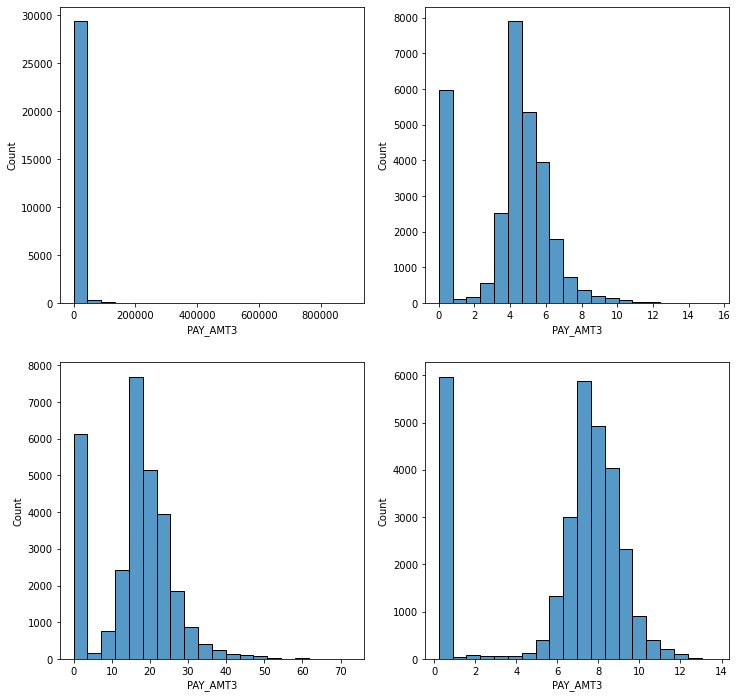

In [32]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

PAYAMT_X3_pwr = np.power(PAYAMT_X3, 0.199999)
PAYAMT_X3_bxcx = boxcox1p(PAYAMT_X3, 0.19999)
PAYAMT_X3_log = np.log(PAYAMT_X3 + 1.25)

sns.histplot(cleandf['PAY_AMT3'], bins = 20, ax=ax[0,0])
sns.histplot(PAYAMT_X3_pwr, bins = 20, ax=ax[0,1])
sns.histplot(PAYAMT_X3_bxcx, bins = 20, ax=ax[1,0])
sns.histplot(PAYAMT_X3_log, bins = 20, ax=ax[1,1])

In [33]:
df_Staged_Transformed['PAY_AMT3'] = PAYAMT_X3_pwr
df_Staged_Transformed.head()

,GENDER,EDUCATION,MARRIAGE,AGE,DEFAULT,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
ID,,,,,,,,,,,,,,
1,2.0,2.0,1.0,24.0,1.0,2.0,2.0,-1.0,21.151353,19.963692,13.481077,0.000000,6.537054,0.000000
2,2.0,2.0,2.0,26.0,1.0,-1.0,2.0,0.0,19.249017,17.200493,19.248065,0.000000,6.909004,3.981044
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,34.098985,28.755627,28.527340,16.640458,7.314053,3.981044
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,37.990544,38.212862,38.400784,17.866694,7.610977,4.128889
5,1.0,2.0,1.0,57.0,0.0,-1.0,0.0,-1.0,25.623252,23.163217,35.719967,17.866694,10.510048,6.309515


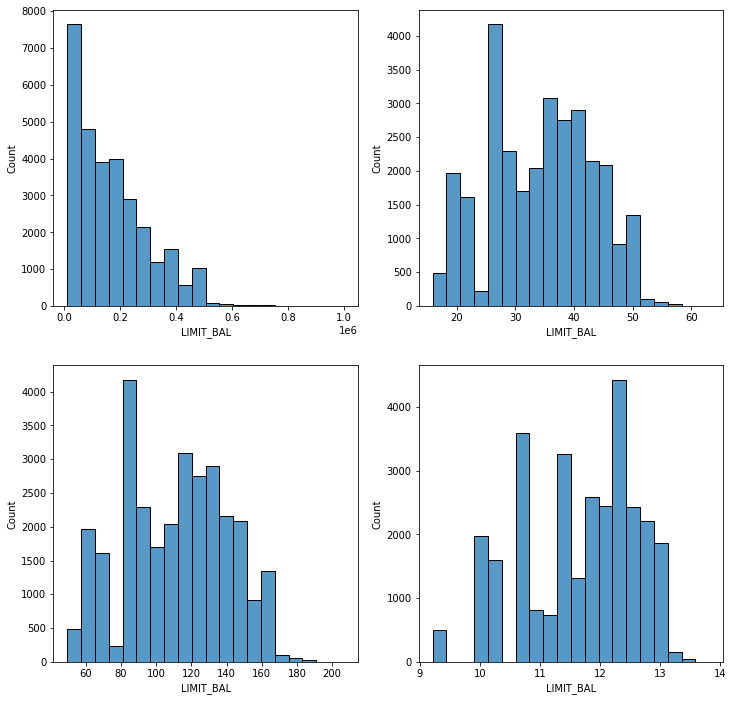

In [34]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

LIMIT_BAL_pwr = np.power(LIMIT_BAL, 0.299999)
LIMIT_BAL_bxcx = boxcox1p(LIMIT_BAL, 0.2999)
LIMIT_BAL_log = np.log(LIMIT_BAL + 0.2)

sns.histplot(cleandf['LIMIT_BAL'], bins = 20, ax=ax[0,0])
sns.histplot(LIMIT_BAL_pwr, bins = 20, ax=ax[0,1])
sns.histplot(LIMIT_BAL_bxcx, bins = 20, ax=ax[1,0])
sns.histplot(LIMIT_BAL_log, bins = 20, ax=ax[1,1])

In [35]:
df_Staged_Transformed['LIMIT_BAL'] = LIMIT_BAL_bxcx
df_Staged_Transformed.head()

,GENDER,EDUCATION,MARRIAGE,AGE,DEFAULT,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,LIMIT_BAL
ID,,,,,,,,,,,,,,,
1,2.0,2.0,1.0,24.0,1.0,2.0,2.0,-1.0,21.151353,19.963692,13.481077,0.000000,6.537054,0.000000,61.664894
2,2.0,2.0,2.0,26.0,1.0,-1.0,2.0,0.0,19.249017,17.200493,19.248065,0.000000,6.909004,3.981044,107.908141
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,34.098985,28.755627,28.527340,16.640458,7.314053,3.981044,98.713041
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,37.990544,38.212862,38.400784,17.866694,7.610977,4.128889,82.220919
5,1.0,2.0,1.0,57.0,0.0,-1.0,0.0,-1.0,25.623252,23.163217,35.719967,17.866694,10.510048,6.309515,82.220919


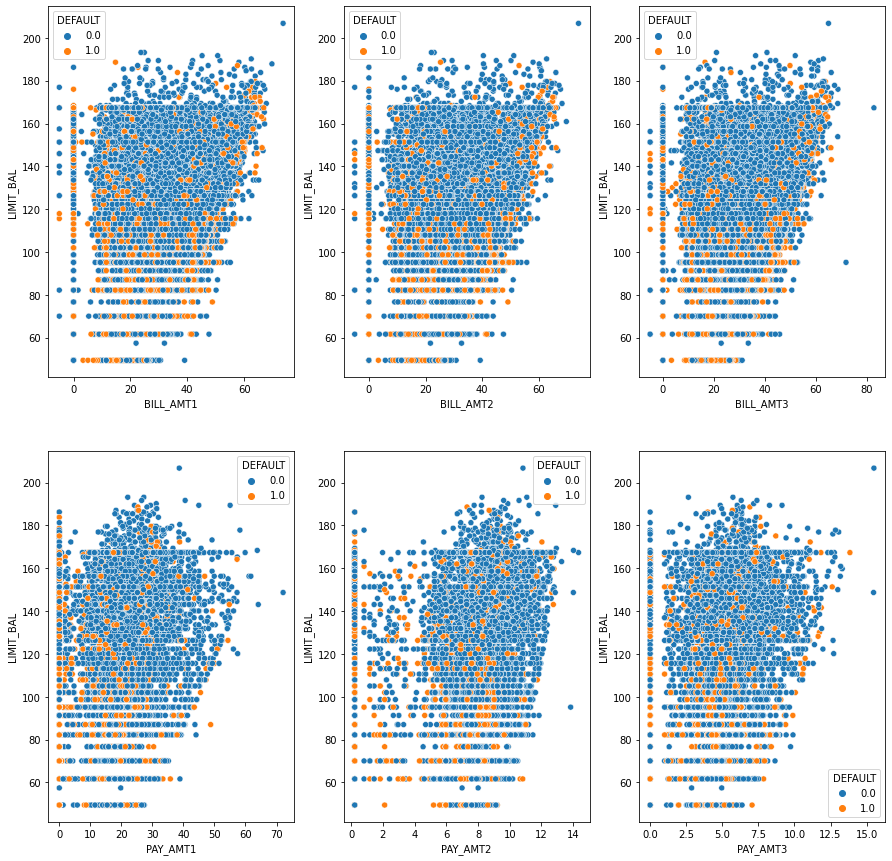

In [36]:
fig, ax = plt.subplots(2,3, figsize=(15,15))
sns.scatterplot(x="BILL_AMT1", y="LIMIT_BAL", hue="DEFAULT", data=df_Staged_Transformed, ax=ax[0,0])
sns.scatterplot(x="BILL_AMT2", y="LIMIT_BAL", hue="DEFAULT", data=df_Staged_Transformed, ax=ax[0,1])
sns.scatterplot(x="BILL_AMT3", y="LIMIT_BAL", hue="DEFAULT", data=df_Staged_Transformed, ax=ax[0,2])
sns.scatterplot(x="PAY_AMT1", y="LIMIT_BAL", hue="DEFAULT", data=df_Staged_Transformed, ax=ax[1,0])
sns.scatterplot(x="PAY_AMT2", y="LIMIT_BAL", hue="DEFAULT", data=df_Staged_Transformed, ax=ax[1,1])
sns.scatterplot(x="PAY_AMT3", y="LIMIT_BAL", hue="DEFAULT", data=df_Staged_Transformed, ax=ax[1,2])
plt.show()

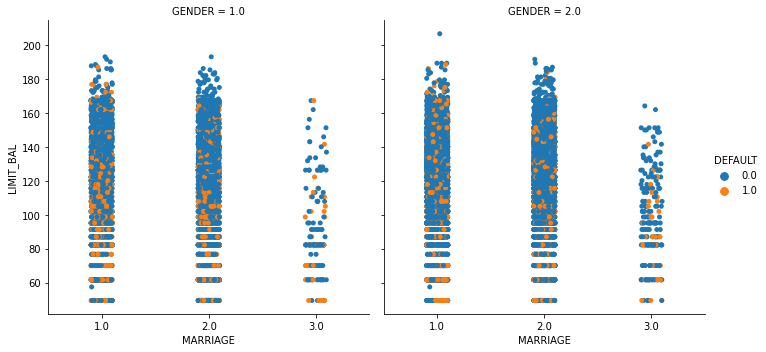

In [37]:
sns.catplot(x="MARRIAGE", y="LIMIT_BAL", hue="DEFAULT", col="GENDER", data=df_Staged_Transformed)

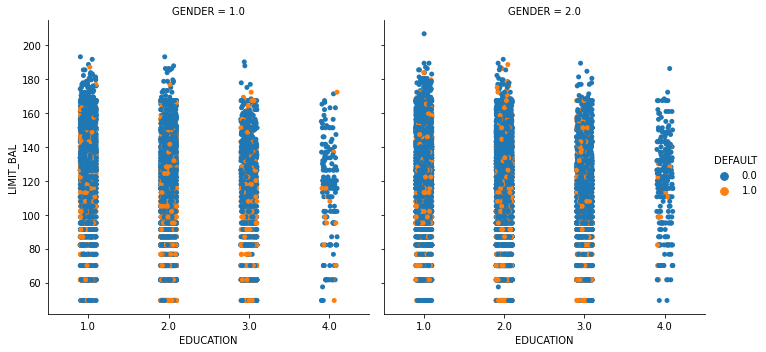

In [38]:
sns.catplot(x="EDUCATION", y="LIMIT_BAL", hue="DEFAULT", col="GENDER", data=df_Staged_Transformed)

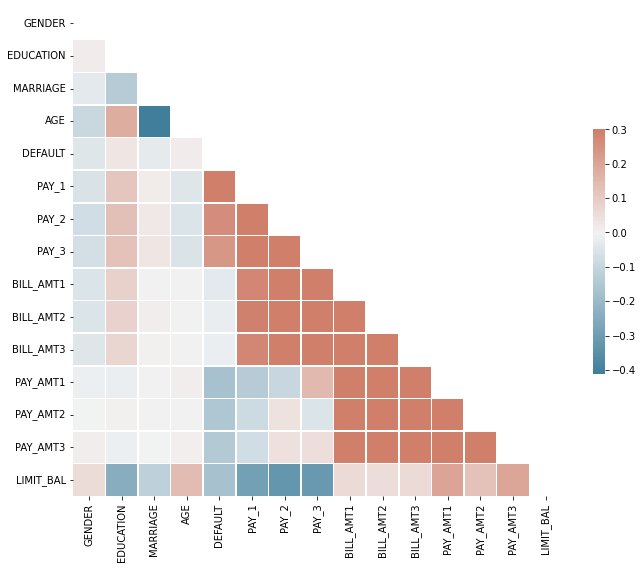

In [39]:
corr = df_Staged_Transformed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
df_Staged_Transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GENDER     29958 non-null  float64
 1   EDUCATION  29958 non-null  float64
 2   MARRIAGE   29958 non-null  float64
 3   AGE        29958 non-null  float64
 4   DEFAULT    29958 non-null  float64
 5   PAY_1      29958 non-null  float64
 6   PAY_2      29958 non-null  float64
 7   PAY_3      29958 non-null  float64
 8   BILL_AMT1  29385 non-null  float64
 9   BILL_AMT2  29308 non-null  float64
 10  BILL_AMT3  29328 non-null  float64
 11  PAY_AMT1   29958 non-null  float64
 12  PAY_AMT2   29958 non-null  float64
 13  PAY_AMT3   29958 non-null  float64
 14  LIMIT_BAL  29958 non-null  float64
dtypes: float64(15)
memory usage: 4.7 MB


In [41]:
df_Staged = df_Staged_Transformed.dropna(axis=0)

In [42]:
df_Staged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28775 entries, 1 to 30000
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GENDER     28775 non-null  float64
 1   EDUCATION  28775 non-null  float64
 2   MARRIAGE   28775 non-null  float64
 3   AGE        28775 non-null  float64
 4   DEFAULT    28775 non-null  float64
 5   PAY_1      28775 non-null  float64
 6   PAY_2      28775 non-null  float64
 7   PAY_3      28775 non-null  float64
 8   BILL_AMT1  28775 non-null  float64
 9   BILL_AMT2  28775 non-null  float64
 10  BILL_AMT3  28775 non-null  float64
 11  PAY_AMT1   28775 non-null  float64
 12  PAY_AMT2   28775 non-null  float64
 13  PAY_AMT3   28775 non-null  float64
 14  LIMIT_BAL  28775 non-null  float64
dtypes: float64(15)
memory usage: 3.5 MB


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
#features = ["GENDER","EDUCATION","MARRIAGE","AGE",
#            "PAY_1","PAY_2","PAY_3",
#            "BILL_AMT1","BILL_AMT2","BILL_AMT3",
#            "PAY_AMT1","PAY_AMT2","PAY_AMT3"]

#MTRX = df_Staged.loc[:, features].values

#values, vectors = np.linalg.eig(MTRX)

#W = vectors
#Winv = np.linalg.inv(W)
#D = np.diag(values)

In [44]:
features = ["GENDER","EDUCATION","MARRIAGE","AGE",
            "PAY_1","PAY_2","PAY_3",
            "BILL_AMT1","BILL_AMT2","BILL_AMT3",
            "PAY_AMT1","PAY_AMT2","PAY_AMT3"]

X = df_Staged.loc[:, features].values
Y = df_Staged.loc[:, ['DEFAULT']].values

X = StandardScaler().fit_transform(X)

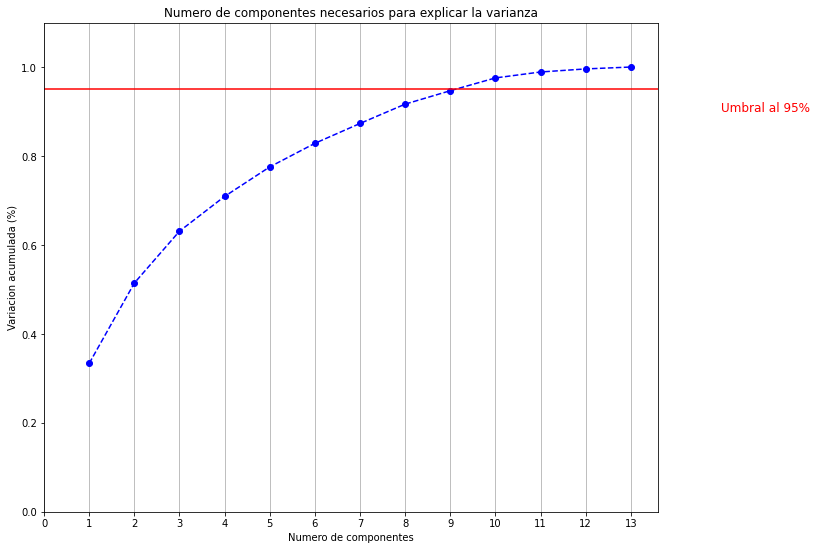

In [45]:
pca = PCA().fit(X)

plt.rcParams["figure.figsize"] = (11,9)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Numero de componentes')
plt.xticks(np.arange(0, 14, step=1))

plt.ylabel('Variacion acumulada (%)')
plt.title('Numero de componentes necesarios para explicar la varianza')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(15, 0.9, 'Umbral al 95%', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

In [46]:
pca095 = PCA(n_components = 0.95)
pca095.fit(X)
pca095.n_components_

10

In [47]:
new_pca = PCA(n_components = pca095.n_components_)
comps = new_pca.fit_transform(X)
new_pca_df = pd.DataFrame(data = comps, columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10'])

In [52]:
new_pca_df['DEFAULT'] = Y

In [48]:
new_pca.explained_variance_ratio_

array([0.33374801, 0.18051785, 0.11660974, 0.07822501, 0.0663213 ,
       0.053053  , 0.04464088, 0.04346949, 0.03017525, 0.02874344])

In [49]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(new_pca.explained_variance_),
                           'Proportion of variance': new_pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(new_pca.explained_variance_ratio_)}
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.082997,0.333748,0.333748
1,1.531931,0.180518,0.514266
2,1.231251,0.116610,0.630876
3,1.008445,0.078225,0.709101
4,0.928551,0.066321,0.775422
5,0.830490,0.053053,0.828475
6,0.761808,0.044641,0.873116
7,0.751747,0.043469,0.916585
8,0.626332,0.030175,0.946761
9,0.611292,0.028743,0.975504


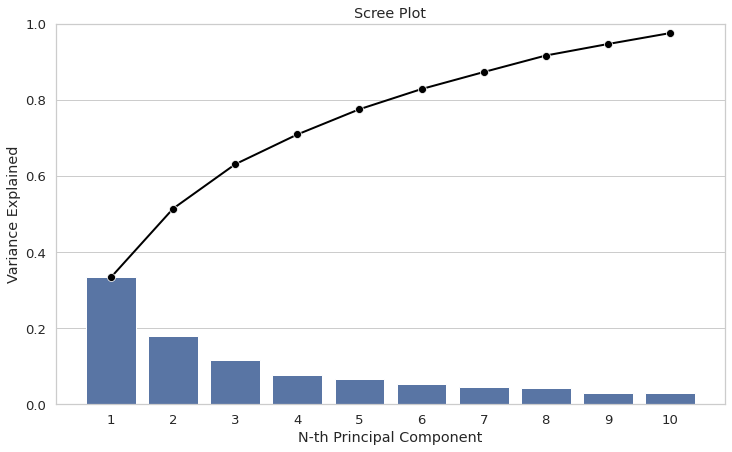

In [50]:
PC_components = np.arange(new_pca.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(12, 7))

_ = sns.barplot(x = PC_components, 
                y = new_pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(new_pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

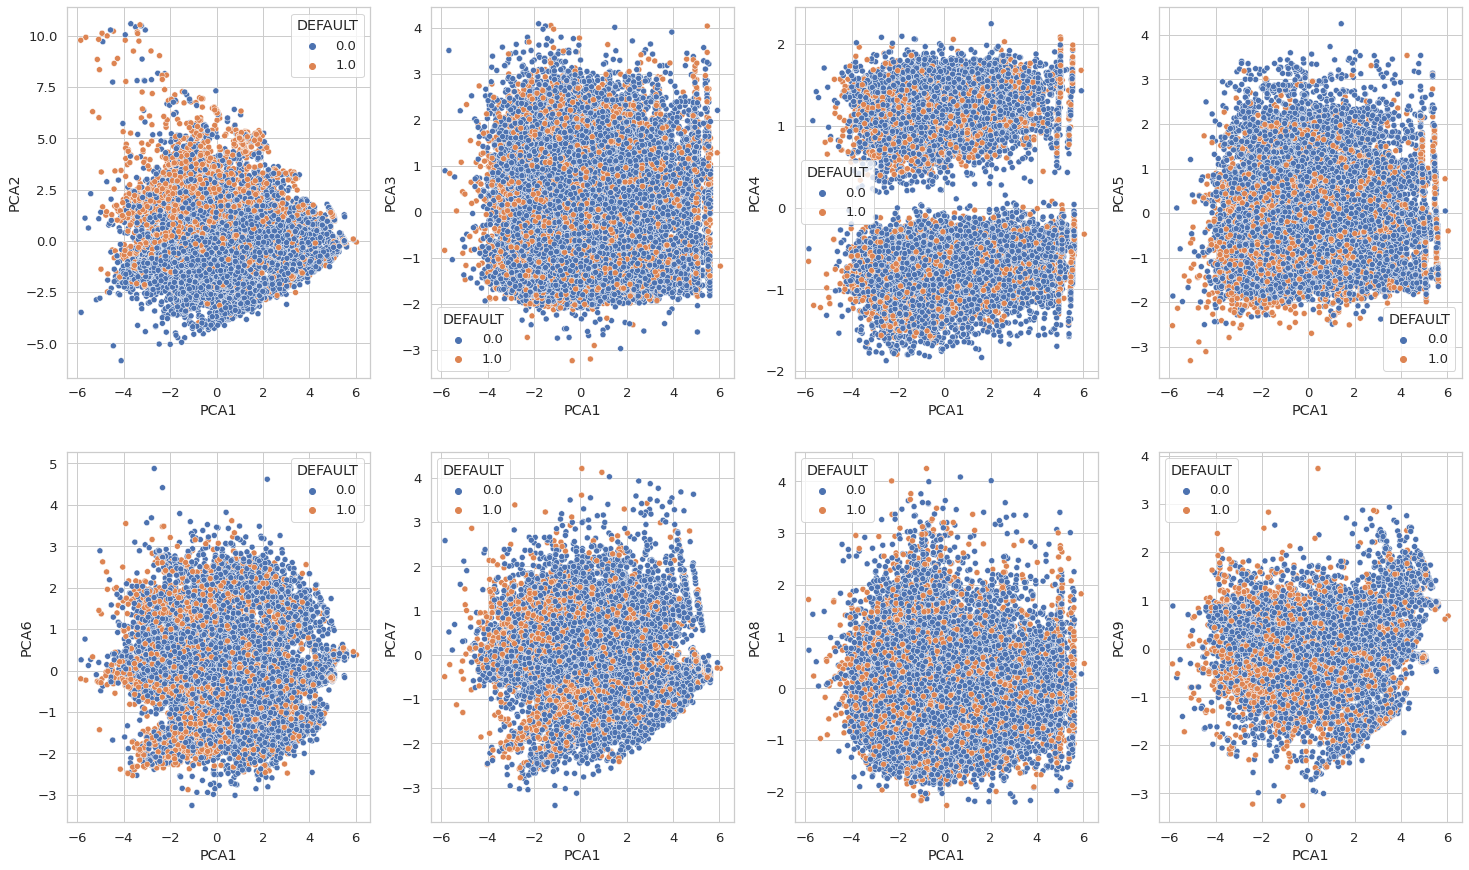

In [54]:
fig, ax = plt.subplots(2,4, figsize=(25,15))
sns.scatterplot(x="PCA1", y="PCA2", hue="DEFAULT", data=new_pca_df, ax=ax[0,0])
sns.scatterplot(x="PCA1", y="PCA3", hue="DEFAULT", data=new_pca_df, ax=ax[0,1])
sns.scatterplot(x="PCA1", y="PCA4", hue="DEFAULT", data=new_pca_df, ax=ax[0,2])
sns.scatterplot(x="PCA1", y="PCA5", hue="DEFAULT", data=new_pca_df, ax=ax[0,3])
sns.scatterplot(x="PCA1", y="PCA6", hue="DEFAULT", data=new_pca_df, ax=ax[1,0])
sns.scatterplot(x="PCA1", y="PCA7", hue="DEFAULT", data=new_pca_df, ax=ax[1,1])
sns.scatterplot(x="PCA1", y="PCA8", hue="DEFAULT", data=new_pca_df, ax=ax[1,2])
sns.scatterplot(x="PCA1", y="PCA9", hue="DEFAULT", data=new_pca_df, ax=ax[1,3])
plt.show()

**1.- ¿Cuál es el número de componentes mínimo y por qué?**

*Eligiendo un umbral de varianza del 95%, el numero de PCAs es 10*


**2.- ¿Cuál es la variación de los datos que representan esos componentes?**

*PCA1 = 25.95%*;
*PCA2 = 17.09%*;
*PCA3 = 11.62%*

*Acumulando los PCAs del 4 al 10, la varianza es 42.9%*


**3.- ¿Cuál es la pérdida de información después de realizar PCA?**

*2.39%*


**5.- Graficar los PCA, usar la variable dependiente como Hue, ¿Qué se puede apreciar?**

Si bien es dificil dar una interpretación detallada, el uso de un diagrama de dispersión con los PCAs y la variable dependiente puede revelar clusteres de agrupacipon y algunos patrones que ayuden a dar una idea de cómo están relacionadas las varianzas. El primer gráfico (PCA1, PCA2) tiene un cierto parecido con el sexto (PCA1, PCA7), también comparten parecido PCA1-PCA3 con PCA1-PCA8. Finalmemte, en PCA1-PCA4 es facil apreciar dos agrupaciones, es muy probable que estas sean por la variable categórica del Genero.